<a href="https://colab.research.google.com/github/pengyk/COMP551/blob/main/Copy_of_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.debugger import set_trace
import warnings
from random import shuffle, randrange
warnings.filterwarnings('ignore')

In [ ]:
digits = load_digits()

In [ ]:
def ontHotEncoder(Y):
    output = pd.get_dummies(Y)
    return output

In [ ]:
def cost_fn(x, y, w):
    N, D = x.shape                                                       
    yhat = np.dot(x, w)
    J = - np.sum(y * np.log(yhat+1e-6))  #log1p calculates log(1+x) to remove floating point inaccuracies 
    return J

In [ ]:
def softmax(z):
    exps = np.exp(z - np.max(z))
    return exps / np.sum(exps)

In [ ]:
def delta_cross_entropy(X,y):
    """
    X is the output from fully connected layer (num_examples x num_classes)
    y is labels (num_examples x 1)
    	Note that y is not one-hot encoded vector. 
    	It can be computed as y.argmax(axis=1) from one-hot encoded vectors of labels if required.
    """
    m = len(y)
    print("delta_cross_entropy: X is here!")
    print(X)

    print(X.shape)
    grad = softmax(X)
    print(grad)
    print(grad.shape)
    grad[range(m),y] -= 1
    grad = grad/m
    return grad

In [ ]:
def gradient(x, y,w):
    print("gardient, X is here")
    print(x)
    yh = softmax(np.dot(x, w))    # predictions  size N
    # J = - np.sum(y * np.log(yhat+1e-6))
    y_afterOneHot = ontHotEncoder(yh)

    grad = delta_cross_entropy(y_afterOneHot,y)/N        # divide by N because cost is mean over N points
    return grad                         # size D                      # size D

In [ ]:
class MultiClassLogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose

    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        w0 = np.zeros(D)                                # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = softmax(np.dot(x,self.w))
        return yh

MultiClassLogisticRegression.gradient = gradient    

In [ ]:
class GradientDescent:
   def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False, batch_size = 20, momentum = 0.9):
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
   def run(self, gradient_fn, x, y, w):
      grad = np.inf
      t = 1
      while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
          mini_X = []
          mini_Y = []
          for i in range (0, self.batch_size):
            rand_index = randrange(0, x.shape[0]-1)
            if len(mini_X) == 0:
              mini_X = x[rand_index]
            else:
              mini_X = np.vstack((mini_X,x[rand_index])) 
            mini_Y.append(y[rand_index])
          print(mini_X.shape)
          print(len(mini_Y))
          print(mini_X)
          print(mini_Y)
          grad = gradient_fn(mini_X,mini_Y,w)  #compute gradient with present weight
          print(np.linalg.norm(grad))
          print()
          w = w - np.dot(self.learning_rate, grad)  #weigh update
          if self.record_history:
            self.w_history.append(w)
          t+=1
      return w

Digits dataset

<Figure size 432x288 with 0 Axes>

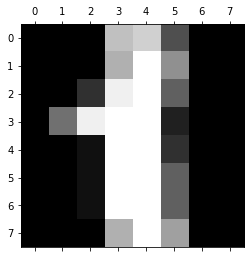

(20, 64)
20
[[ 0.  0.  1. ... 16. 11.  1.]
 [ 0.  0.  9. ...  2.  0.  1.]
 [ 0.  1. 15. ...  0.  0.  1.]
 ...
 [ 0.  2. 11. ...  0.  0.  1.]
 [ 0.  1.  7. ...  7.  0.  1.]
 [ 0.  0.  5. ... 16. 14.  1.]]
[6, 5, 5, 1, 2, 8, 2, 3, 6, 9, 6, 3, 6, 7, 4, 8, 4, 3, 3, 2]
gardient, X is here
[[ 0.  0.  1. ... 16. 11.  1.]
 [ 0.  0.  9. ...  2.  0.  1.]
 [ 0.  1. 15. ...  0.  0.  1.]
 ...
 [ 0.  2. 11. ...  0.  0.  1.]
 [ 0.  1.  7. ...  7.  0.  1.]
 [ 0.  0.  5. ... 16. 14.  1.]]
delta_cross_entropy: X is here!
    0.05
0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
(20, 1)
        0.05
0   0.049988
1   0.049988
2   0.049988
3   0.049988
4   0.049988
5   0.049988
6   0.049988
7   0.049988
8   0.049988
9   0.049988
10  0.049988
11  0.049988
12  0.049988
13  0.049988
14  0.049988
15  0.049988
16  0.049988
17  0.049988
18  0.049988
19  0.049988
(20, 1)


TypeError: ignored

In [ ]:
digits = load_digits()

plt.gray()
plt.matshow(digits.images[1]) 
plt.show() 
x, y = digits['data'], digits['target']
# print(x[0].shape)
# print(np.unique(y))
# print(y)
# print(y.shape)
# print(x[0].shape)
# print(x[0])
# print(x.type)
x = [ele[:-1] for ele in x]
x = np.asarray(x) 
# y_oneHot = ontHotEncoder(y)
# print(y_oneHot)
# print(y_oneHot.shape)

model = MultiClassLogisticRegression()
optimizer = GradientDescent()
model.fit(x,y, optimizer)
